Криптоанализ шифра простой замены.


Самая первая идея, которая приходит в голову, если появляется потребность декодировать шифротекст, не имея ключа - это подобрать все возможные варианты перестановок. Такой способ может оказаться полезным, однако нужно понимать, что количество разных перестановок равняется m!, где m - мощность алфавита. 

Почти во всех современных языках более $25$ букв (в английском $26$, в русском $33$), в таком случае количество возможных перестановок будет равняться $26!$ и $33!$ соответственно (и это без учета специальных знаков). Вычислительная сложность данного подхода не позволяет применять его на практике. Однако, это не значит, что шифр надежен

Уязвимость данного шифра заключается в частоте встречаемых букв в алфавите. Действительно, в любой книге или статье буква "а" встречается явно чаще, чем "ъ". При шифровании данным способом, частота встречаемости символа в исходном тексте перейдет в шифротекст. Таким способом можно легко определить исходную перестановку. Давайте убедимся в этом.

Я взял текст романа "Война и мир" (французский текст был переведен на русский), убрал оттуда все латинские символы. Давайте проверим, какие символы в данном тексте встречаются чаще всего, а какие реже


In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt

In [29]:
with open('Russian_text.txt') as f:
    text = f.read().replace('\n', ' ')
text = text.lower() #Заглавные символы и строчные считаем одинаковыми
letters = re.findall(r'[а-яё]', text)
counts = Counter(letters)

total = sum(counts.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")

for char, count in counts.most_common():
    percent = (count / total) * 100
    print(f"'{char}':    {count}     {percent:.3f}%") 

Буква   Кол-во   %
'о':    170350     11.440%
'е':    122691     8.240%
'а':    122599     8.233%
'и':    98730     6.630%
'н':    97847     6.571%
'т':    86561     5.813%
'с':    78317     5.260%
'л':    75534     5.073%
'в':    67509     4.534%
'р':    66235     4.448%
'к':    51504     3.459%
'д':    45244     3.038%
'м':    44492     2.988%
'у':    41408     2.781%
'п':    38662     2.596%
'я':    33406     2.243%
'ь':    29566     1.986%
'г':    29329     1.970%
'ы':    28763     1.932%
'б':    26480     1.778%
'з':    25312     1.700%
'ч':    21693     1.457%
'й':    17263     1.159%
'ж':    15497     1.041%
'ш':    13760     0.924%
'х':    12876     0.865%
'ю':    9488     0.637%
'ц':    5328     0.358%
'э':    4762     0.320%
'щ':    4237     0.285%
'ф':    2932     0.197%
'ъ':    659     0.044%
'ё':    22     0.001%


Теперь можно сделать вывод, что буква "о" встречается чаще всего, а "ё" реже всего. Построим график для наглядности


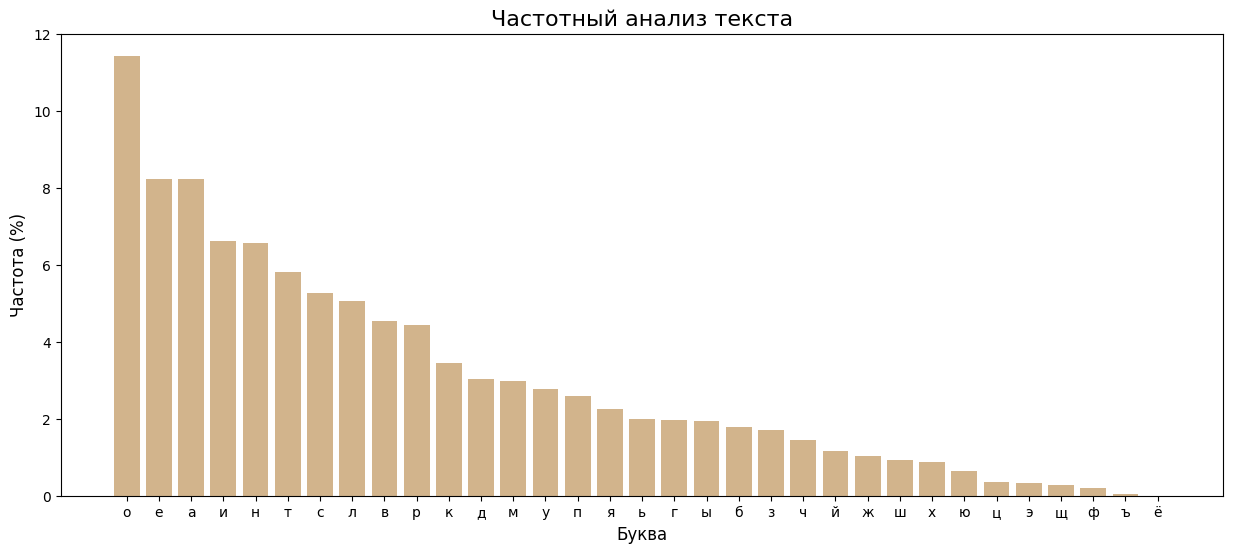

In [30]:
sorted_items = counts.most_common()
labels = [item[0] for item in sorted_items]
values = [(item[1] / total) * 100 for item in sorted_items]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ текста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

In [25]:
from simpleCiphers import SimpleCiphers
from simpleCiphers import save_in_file
alphabet = "а б в г д е ё ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я".replace(" ", "")
cipher = SimpleCiphers(alphabet)
with open("big_shablon.txt") as file:
    file = file.read()
save_in_file(cipher.simple_substitution_encrypt(file, "мфыэжщшцлнбюкъярпаьсчтхдгевиозёуй"))

Теперь зашифруем первые две тысячи символов этого же текста с помощью ключа "мфыэжщшцлнбюкъярпаьсчтхдгевиозёуй". Я сохранил себе шифртекст в файл cryptotext_test.txt, давайте построим такую же диаграмму 


$$
\begin{aligned}
\text{Алфавит: } & \begin{pmatrix} 
\text{а} & \text{б} & \text{в} & \text{г} & \text{д} & \text{е} & \text{ё} & \text{ж} & \text{з} & \text{и} & \text{й} & \text{к} & \text{л} & \text{м} & \text{н} & \text{о} & \text{п} \\
\text{м} & \text{ф} & \text{ы} & \text{э} & \text{ж} & \text{щ} & \text{ш} & \text{ц} & \text{л} & \text{н} & \text{б} & \text{ю} & \text{к} & \text{ъ} & \text{я} & \text{р} & \text{п}
\end{pmatrix} \\
\\
\text{Продолжение: } & \begin{pmatrix} 
\text{р} & \text{с} & \text{т} & \text{у} & \text{ф} & \text{х} & \text{ц} & \text{ч} & \text{ш} & \text{щ} & \text{ъ} & \text{ы} & \text{ь} & \text{э} & \text{ю} & \text{я} \\
\text{а} & \text{ь} & \text{с} & \text{ч} & \text{т} & \text{х} & \text{д} & \text{г} & \text{е} & \text{в} & \text{и} & \text{о} & \text{з} & \text{ё} & \text{у} & \text{й}
\end{pmatrix}
\end{aligned}
$$

In [27]:
with open("cryptotext_simple.txt") as file:
    text = file.read()
letters = re.findall("[а-яё]", text)

letters_count = Counter(letters)
total_count = sum(letters_count.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")
print(letters_count)
for char, l_count in letters_count.most_common():
    percent = (l_count / total_count) * 100
    print(f"'{char}':    {l_count}     {percent:.3f}%") 

Буква   Кол-во   %
Counter({'р': 49665, 'м': 36623, 'щ': 34888, 'н': 29486, 'я': 28674, 'с': 24876, 'ь': 22684, 'к': 22013, 'ы': 20089, 'а': 19951, 'ю': 15976, 'ж': 13315, 'ъ': 13174, 'й': 13057, 'ч': 12503, 'п': 11373, 'э': 8924, 'з': 8605, 'о': 8348, 'л': 7780, 'ф': 7688, 'г': 6002, 'б': 5067, 'ц': 4460, 'е': 4128, 'х': 3759, 'у': 2932, 'д': 1813, 'ё': 1296, 'в': 1224, 'т': 1051, 'и': 219, 'ш': 10})
'р':    49665     11.245%
'м':    36623     8.292%
'щ':    34888     7.899%
'н':    29486     6.676%
'я':    28674     6.492%
'с':    24876     5.632%
'ь':    22684     5.136%
'к':    22013     4.984%
'ы':    20089     4.549%
'а':    19951     4.517%
'ю':    15976     3.617%
'ж':    13315     3.015%
'ъ':    13174     2.983%
'й':    13057     2.956%
'ч':    12503     2.831%
'п':    11373     2.575%
'э':    8924     2.021%
'з':    8605     1.948%
'о':    8348     1.890%
'л':    7780     1.762%
'ф':    7688     1.741%
'г':    6002     1.359%
'б':    5067     1.147%
'ц':    4460     1.010%
'е

Построим график

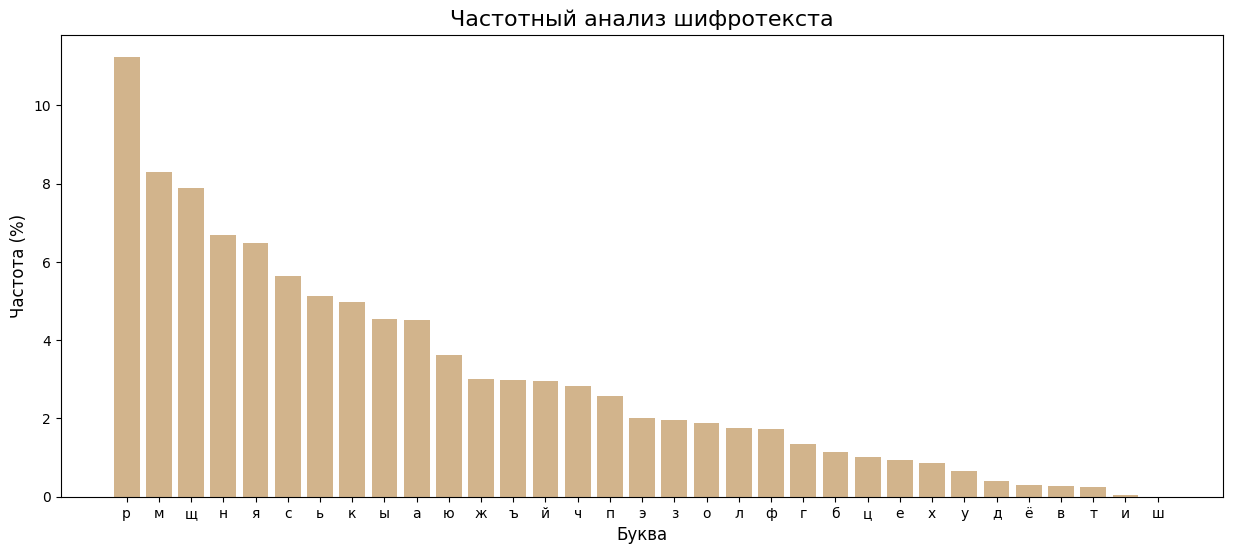

In [ ]:
sorted_items_crypto = letters_count.most_common()
labels = [item[0] for item in sorted_items_crypto]
values = [(item[1] / total_count) * 100 for item in sorted_items_crypto]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ шифротекста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

Из этого графика видно, какие буквы чаще встречаются в шифротексте, а какие реже. Из этого можно сделать вывод, что частовстречаемые буквы в исходном тексте перейдут в частовстречаемые буквы в шифротексте. Так, буква "о' перешла в 'р', "ё" в ш и тд.
можно восстановить ключ - мфыэжщшцлнбюкъярпаьсчтхдгевиозёуй или щыэжмшцлнбюкъярпаьсчтхдгевиозёуй
Простым перебором делаем вывод, что верный ключ - первый



Криптоанализ аффинного шифра.


Аффинный шифр остается моноалфавитным шифром подстановки, поэтому каждой букве открытого текста соответсвует ровно одна буква шифротекста. Но взломать аффинный шифр можно и без частотного анализа, просто перебрав все возможные ключи. Возьмем за основу русский алфавит за $33$ буквами. Вторая буква ключа (b) может быть любой от $0$ до $32$, всего $33$ различных варианта. Первая буква ключа (а) должна удовлетворять уравнению $НОД(а, m) = 1.$ Посчитать все возможные взаимно простые числа для m можно с помощью функции Эйлера. Функция задается формулой:

$$ \phi(n) = n \prod_{p|n} \left( 1 - \frac{1}{p} \right), \quad n > 1, $$
где $p$ - простое число и пробегает все значения, участвующие в разложении $n$ на простые множители 

Так, $$33 = 3 \cdot 11$$

Тогда $$ \phi(33) = 33 \cdot \left(1 - \frac{1}{3}\right) \cdot \left(1 - \frac{1}{11}\right) = 33 \cdot \frac{2}{3} \cdot \frac{10}{11} = 20$$



Тогда все возможные варианты ключей $$20 \cdot 33 = 660 $$

Очевидно, что любой современный (и даже не самый современный) компьютер может перебрать все возможные ключи обычным перебором. Однако, аффинный шифр был придуман несколько тысяч лет назад и ни о каком компьютерном переборе речи и быть не могло, поэтому дешифровать текст можно и вручную, воспользовавшись частотным анализом

Мною был зашифрован небольшой текст в affine_test.txt, составим частотный анализ шифротекста


In [31]:
from simpleCiphers import SimpleCiphers
from simpleCiphers import save_in_file
alphabet = "а б в г д е ё ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я".replace(" ", "")
cipher = SimpleCiphers(alphabet)
with open("big_shablon.txt") as file:
    file = file.read()
save_in_file(cipher.affine_cipher_encrypt(file, 4, 7))

In [32]:
with open("affine_test.txt") as file:
    text = file.read()
letters = re.findall("[а-яё]", text)

letters_count = Counter(letters)
total_count = sum(letters_count.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")
for char, l_count in letters_count.most_common():
    percent = (l_count / total_count) * 100
    print(f"'{char}':    {l_count}     {percent:.3f}%") 

Буква   Кол-во   %
'б':    259923     11.375%
'ъ':    187324     8.198%
'ж':    186098     8.144%
'й':    150819     6.600%
'э':    149297     6.534%
'р':    131677     5.762%
'м':    119988     5.251%
'х':    114993     5.032%
'о':    103395     4.525%
'и':    101910     4.460%
'с':    78743     3.446%
'ц':    69182     3.028%
'щ':    68271     2.988%
'ф':    63528     2.780%
'г':    62837     2.750%
'е':    58629     2.566%
'т':    45161     1.976%
'ч':    44768     1.959%
'у':    43902     1.921%
'к':    40343     1.765%
'ё':    38752     1.696%
'д':    32810     1.436%
'н':    26406     1.156%
'в':    23624     1.034%
'з':    20838     0.912%
'ь':    19623     0.859%
'я':    14548     0.637%
'а':    8282     0.362%
'ы':    7273     0.318%
'л':    6503     0.285%
'ш':    4597     0.201%
'п':    1007     0.044%
'ю':    25     0.001%


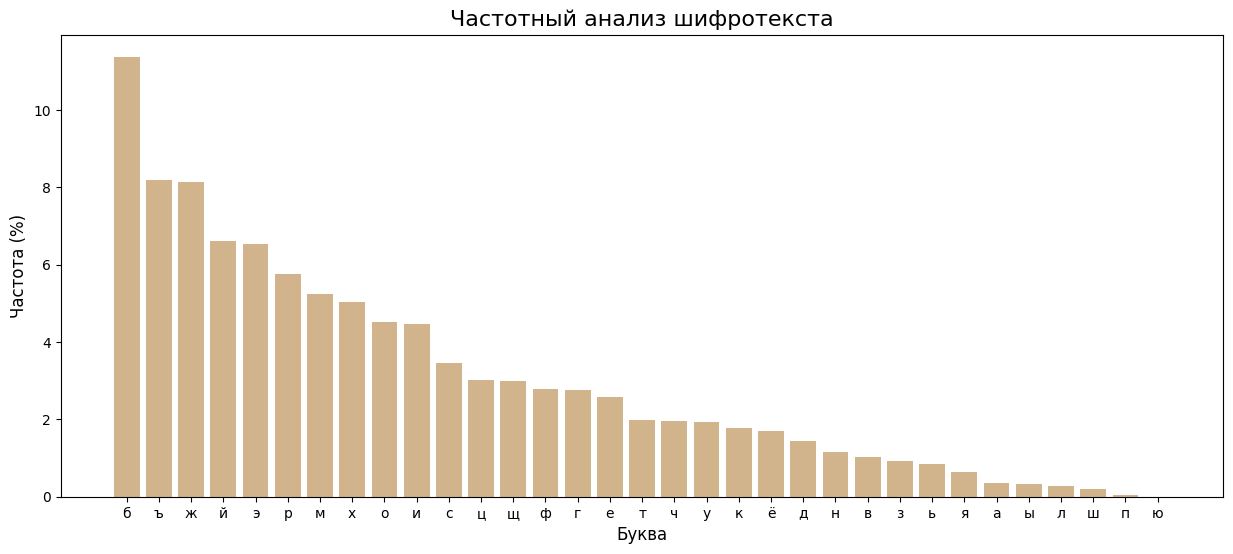

In [33]:
sorted_items_crypto = letters_count.most_common()
labels = [item[0] for item in sorted_items_crypto]
values = [(item[1] / total_count) * 100 for item in sorted_items_crypto]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ шифротекста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

Посколько шифр моноалфавитный, очевидно, что "о" перешла в "б", а "ё" перешла в "ю". Этих знаний достаточно, чтобы вычислить исходный ключ. Решим систему:


$$
\begin{cases}
15a + b \equiv 1 \ (\text{mod } 33) \\
6a + b \equiv 31 \ (\text{mod } 33)
\end{cases}
$$

Вычтем второе уравнение из первого:

$$
(15a + b) - (6a + b) \equiv 1 - 31 \ (\text{mod } 33)
$$

$$
9a \equiv -30 \ (\text{mod } 33) \implies 9a \equiv 3 \ (\text{mod } 33)
$$

Разделим на 3 (по модулю 11):

$$
3a \equiv 1 \ (\text{mod } 11)
$$

Решение:

$$
a = 4
$$

Теперь найдём \(b\):

$$
6a + b \equiv 31 \ (\text{mod } 33) \implies 24 + b \equiv 31 \ (\text{mod } 33) \implies b = 7
$$

Теперь можно расшифровать


In [ ]:
from simpleCiphers import SimpleCiphers, save_in_file
with open("affine_test.txt") as file:
    file = file.read()
alphabet = "а б в г д е ё ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я".replace(" ", "")
cipher = SimpleCiphers(alphabet)
save_in_file(cipher.affine_cipher_decrypt(file,4,7))

Криптоанализ рекуррентного аффинного шифра

Аффинный рекуррентный шифр - усиление обычного аффинного шифра, поскольку является полиалфавитным. Зашифруем текст и проверим. Сразу можно заметить, что в слове "толстой" разные буквы "c" и "т" зашифровались в одну и ту же букву "я". Это делает частотный анализ затруднительным. Построим график для наглядности

In [3]:
with open("affine_recur_test.txt") as file:
    text = file.read()
letters = re.findall("[а-яё]", text)

letters_count = Counter(letters)
total_count = sum(letters_count.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")
print(letters_count)
for char, l_count in letters_count.most_common():
    percent = (l_count / total_count) * 100
    print(f"'{char}':    {l_count}     {percent:.3f}%") 

Буква   Кол-во   %
Counter({'м': 76, 'я': 75, 'ы': 71, 'в': 71, 'т': 69, 'й': 67, 'о': 67, 'ь': 66, 'и': 62, 'с': 61, 'з': 61, 'л': 59, 'е': 57, 'ш': 57, 'а': 57, 'ъ': 57, 'ц': 56, 'д': 55, 'х': 54, 'ж': 54, 'г': 54, 'п': 53, 'у': 53, 'н': 51, 'р': 50, 'щ': 47, 'б': 43, 'к': 42, 'э': 42, 'ю': 42, 'ё': 41, 'ф': 39, 'ч': 32})
'м':    76     4.128%
'я':    75     4.074%
'ы':    71     3.857%
'в':    71     3.857%
'т':    69     3.748%
'й':    67     3.639%
'о':    67     3.639%
'ь':    66     3.585%
'и':    62     3.368%
'с':    61     3.313%
'з':    61     3.313%
'л':    59     3.205%
'е':    57     3.096%
'ш':    57     3.096%
'а':    57     3.096%
'ъ':    57     3.096%
'ц':    56     3.042%
'д':    55     2.988%
'х':    54     2.933%
'ж':    54     2.933%
'г':    54     2.933%
'п':    53     2.879%
'у':    53     2.879%
'н':    51     2.770%
'р':    50     2.716%
'щ':    47     2.553%
'б':    43     2.336%
'к':    42     2.281%
'э':    42     2.281%
'ю':    42     2.281%
'ё':    41    

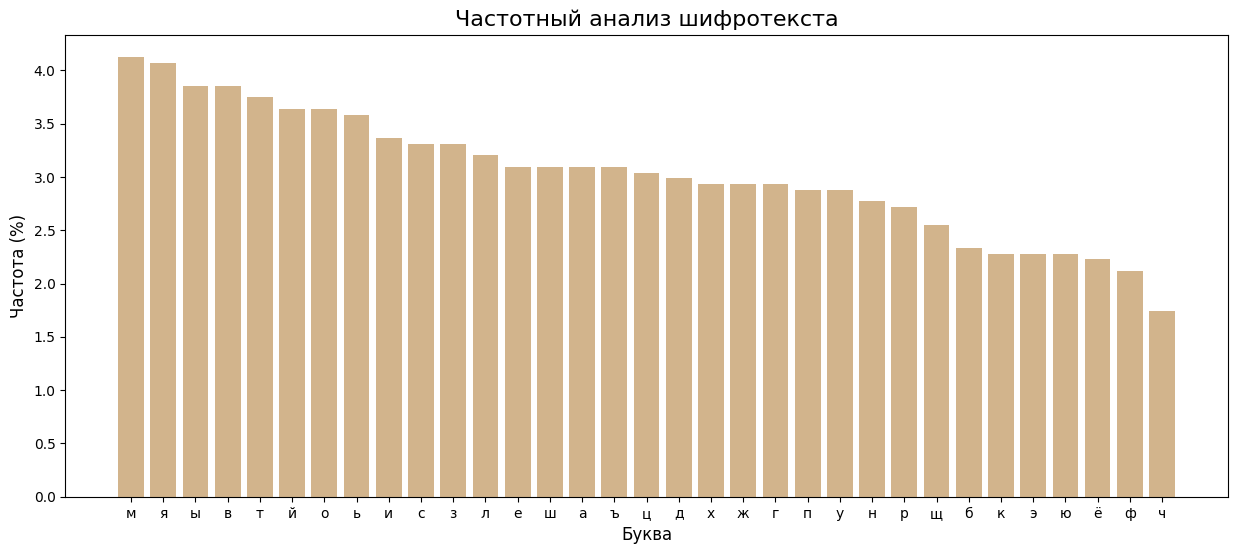

In [4]:
sorted_items_crypto = letters_count.most_common()
labels = [item[0] for item in sorted_items_crypto]
values = [(item[1] / total_count) * 100 for item in sorted_items_crypto]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ шифротекста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

Как мы можем заметить, в шифротексте буквы встречаются почти равномерно и это не позволяет сделать обычный криптоанализ и сказать, что самая встречаемая буква в шифротексте точно будет являться самой встречаемой в языке.

Проверим, возможно ли перебрать все возможные ключи для русского языка. $a_1, a_2$ принимают все возможные значения, для которых $НОД(a_i, m) = 1 \pmod m$, а $b_i$ принимает все возможные значения по модулю от $0$ до $m-1$. Тогда все возможные значения равны
 

$$ \phi(33) \cdot 33 \cdot \phi(33) \cdot 33 = 435600 $$

Очевидно, перебрать все возможные ключи не составляет труда

Максимальное возможное число различных ключей равно
$$ (m - 2)^2 \cdot m^2 = m^4 - 4m^3 + 4m^2$$
В случае, если m - простое число
С учетом того, что в большинстве случаев $ m <= 40 $, перебрать все возможные ключи несложно

Есть и другие способы проведения криптоанализа аффинного рекуррентного шифра. Один из них - криптоанализ по открытому тексту. Если известно, что какая-то часть шифротекста соответсвует части открытого текста, то можно расшифровать весь остальной текст

Допустим, мы знаем, что третье слово шифротекста "ящуяяйжежщ" соответствует третьему слову открытого текста "николаевич". В таком случае 

Алфавит из 33 букв, нумерация: \(а=0, ... , я=32\).

Формула шифрования:

$$
y_i \equiv a_i x_i + b_i \pmod{33}
$$

Из условия:

$$
\text{ящуяяйжежщ} \rightarrow \text{николаевич}
$$

Получаем систему:

$$
\begin{cases}
32a_1 + b_1 \equiv 14 \pmod{33} \\
26a_2 + b_2 \equiv 9 \pmod{33} \\
20a_1 a_2 + b_1 + b_2 \equiv 11 \pmod{33}
\end{cases}
$$

Выразим \(b_1\) и \(b_2\):

$$
b_1 \equiv 14 - 32a_1 \pmod{33}, \quad
b_2 \equiv 9 - 26a_2 \pmod{33}
$$

Подставим в третье уравнение:

$$
20 a_1 a_2 + (14 - 32a_1) + (9 - 26a_2) \equiv 11 \pmod{33}
$$

Приведём подобные:

$$
20 a_1 a_2 - 32 a_1 - 26 a_2 + 12 \equiv 0 \pmod{33}
$$

Перебором допустимых значений (обратимых по модулю 33) получаем решение:


In [7]:
import math

def solve():
    alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"
    
    cipher_full = "мыхяяьс пхл ящуяяйжежщ дяхно ш ёзх"
    target_cipher = "ящуяяйжежщ"
    target_plain = "николаевич"
    
    start_pos = 11 

    possible_a = [i for i in range(33) if math.gcd(i, 33) == 1]
    
    for a1 in possible_a:
        for a2 in possible_a:
            for b1 in range(33):
                for b2 in range(33):
                    a = [0, a1, a2]
                    b = [0, b1, b2]
                    
                    for i in range(3, start_pos + len(target_plain)):
                        a.append((a[i-1] * a[i-2]) % 33)
                        b.append((b[i-1] + b[i-2]) % 33)
                    
                    match = True
                    for i in range(len(target_plain)):
                        idx = start_pos + i
                        x = alphabet.index(target_plain[i])
                        y = alphabet.index(target_cipher[i])
                        
                        if (a[idx] * x + b[idx]) % 33 != y:
                            match = False
                            break
                    
                    if match:
                        return a1, a2, b1, b2, a, b

    return None

result = solve()

if result:
    a1, a2, b1, b2, all_a, all_b = result
    alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"
    cipher_full = "мыхяяьс пхл ящуяяйжежщ дяхно ш ёзх"
    
    print(f"Ключи найдены! a1={a1}, a2={a2}, b1={b1}, b2={b2}")
    print("-" * 30)
    
            
else:
    print("Ключи не найдены.")

Ключи найдены! a1=7, a2=5, b1=12, b2=19
------------------------------


Мы нашли изначальные ключи. Действительно, именно так я и шифровал текст. Теперь расшифровать весь остальной текст не составляет труда

In [66]:
from simpleCiphers import SimpleCiphers
alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"
with open('affine_recur_test.txt') as file:
    cipher_text = file.read()
key_1a = 7
key_1b = 12
key_2a = 5
key_2b = 19
cipher = SimpleCiphers(alphabet)
decrypted_text = cipher.affine_recurrent_cipher_decrypt(
    cipher_text,
    key_1a,
    key_1b,
    key_2a,
    key_2b
)

print("Расшифрованный текст:")
print(decrypted_text)

Расшифрованный текст:
толстой лев николаевич война и мир. первый вариант романа .классика регистрация найти рейтинги обсуждения новинки обзоры помощь комментарии , последний от . толстой лев николаевич . год обновлено . . статистика. роман проза романы    скачать оценка . ваша оценка лев николаевич толстой война и мир первый вариант романа источник издательство захаров, г. твердый переплет, стр. тираж экз. текст предоставлен издателем. при подготовке этого издания использованы тексты, опубликованные э.е.зайденшнур в м томе литературного наследства, рукописные материалы к роману из томов юбилейного томного собрания сочинений л.толстого, а также е прижизненное издание романа, опубликованное в х томах в году. от издателя . в два раза короче и в пять раз интереснее. . почти нет философических отступлений. . в сто раз легче читать весь французский текст заменен русским в переводе самого толстого. . гораздо больше мира и меньше войны. . хеппиэнд.... эти слова я поместил семь лет назад на обл

Но если части открытого текста нет - можно забрутфорсить первые 30 символов и далее расшифровать по открытому тексту

In [6]:
import math
from simpleCiphers import SimpleCiphers
from simpleCiphers import save_in_file
alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"
cipher = SimpleCiphers(alphabet)
with open('affine_recur_test.txt') as file:
    cipher_text = file.read()
cipher_text = cipher_text[:15]
m = 33
possible_a = [i for i in range(33) if math.gcd(i, 33) == 1]
all = ""
for a1 in possible_a:
    for a2 in possible_a:
        for b1 in range(33):
            for b2 in range(33):
                decrypted_text = cipher.affine_recurrent_cipher_decrypt(
                    cipher_text,
                    a1,
                    b1,
                    a2,
                    b2
                )
                all += decrypted_text + "\n"
    print(a1)
save_in_file(all)

1
2
4
5
7
8
10
13
14
16
17
19
20
23
25
26
28
29
31
32


Нашли часть исходного текста. Брутфорс занял 3 минуты